<a href="https://colab.research.google.com/github/Rishabhjain2003/Sales-Analysis/blob/main/Sales_Analysis_pyotrch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

data = pd.read_csv('/content/Stores.csv')
print(data.head())

   Store_ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


In [16]:
data = data.iloc[:, 1:]

x = data.drop(columns=['Store_Sales'])
y = data['Store_Sales']

print(x)
print(y)

     Store_Area  Items_Available  Daily_Customer_Count
0          1659             1961                   530
1          1461             1752                   210
2          1340             1609                   720
3          1451             1748                   620
4          1770             2111                   450
..          ...              ...                   ...
891        1582             1910                  1080
892        1387             1663                   850
893        1200             1436                  1060
894        1299             1560                   770
895        1174             1429                  1110

[896 rows x 3 columns]
0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64


In [17]:
print(y.dtype)

int64


In [20]:
print(x['Store_Area'].dtype)
print(x['Items_Available'].dtype)
print(x['Daily_Customer_Count'].dtype)

int64
int64
int64


In [22]:
X = torch.tensor(x.values, dtype=torch.float64)
print(X)

tensor([[1659., 1961.,  530.],
        [1461., 1752.,  210.],
        [1340., 1609.,  720.],
        ...,
        [1200., 1436., 1060.],
        [1299., 1560.,  770.],
        [1174., 1429., 1110.]], dtype=torch.float64)


In [24]:
Y = torch.tensor(y.values, dtype=torch.float64)
print(Y)

tensor([ 66490.,  39820.,  54010.,  53730.,  46620.,  45260.,  72240.,  37720.,
         46310.,  44150.,  71280.,  57620.,  60470.,  59130.,  66360.,  78870.,
         77250.,  38170.,  63540.,  40190.,  43460.,  68890.,  52780.,  50680.,
         41880.,  70050.,  25820.,  60530.,  78100.,  84860.,  80140.,  14920.,
         60460.,  74560.,  72430.,  45460.,  41570.,  62870.,  55170.,  45480.,
         49550.,  48140.,  67640.,  39730.,  35800.,  49270.,  66510.,  62530.,
         59980.,  76350.,  81820.,  57830.,  70450.,  67000.,  64090.,  48670.,
         66210.,  83660.,  70770.,  53870.,  71300.,  46100.,  49100.,  65920.,
         58660.,  69130.,  49080.,  72710.,  33430.,  42430.,  56650.,  33580.,
         67370.,  71780.,  84840.,  82070.,  26770.,  65560.,  38660.,  65660.,
         40700.,  88910.,  57860.,  42670.,  90180.,  51280.,  97260.,  39650.,
         45720.,  42060.,  65350.,  67080.,  54030.,  56360.,  77120.,  50810.,
         60960.,  61180.,  63660.,  4119

In [25]:
n_samples, n_features = X.shape
print(n_samples, " ", n_features)

896   3


In [93]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size, dtype=torch.float64)

In [94]:
learning_rate = 0.00000015
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [95]:
num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(X)
  loss = criterion(y_pred, Y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if(epoch+1)%10==0:
    print(f'epoch : {epoch+1}, loss : {loss.item():.4f}')

epoch : 10, loss : 535009702.6280
epoch : 20, loss : 378219885.3509
epoch : 30, loss : 372270574.7481
epoch : 40, loss : 371556209.5733
epoch : 50, loss : 371214942.6309
epoch : 60, loss : 371009695.0322
epoch : 70, loss : 370884497.6510
epoch : 80, loss : 370808069.2507
epoch : 90, loss : 370761408.2546
epoch : 100, loss : 370732918.3812


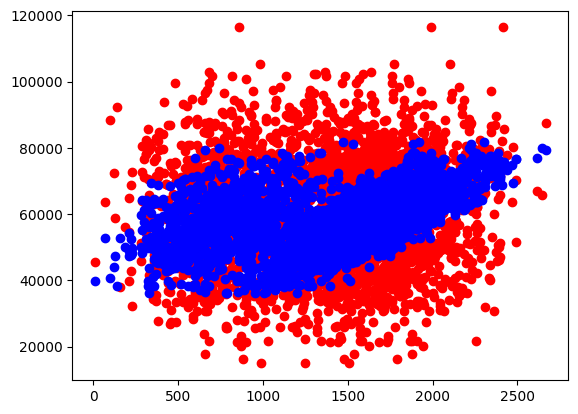

In [96]:
import matplotlib.pyplot as plt

predicted = model(X).detach().numpy()
plt.plot(x, y, 'ro')
plt.plot(x, predicted, 'bo')
plt.show()

In [97]:
print(model(X))

tensor([[59281.4243],
        [48804.8847],
        [52564.3607],
        [54653.7028],
        [61832.7521],
        [56370.5840],
        [63554.2881],
        [54401.7170],
        [44332.6337],
        [48871.0374],
        [53433.1898],
        [65364.7765],
        [69643.8581],
        [67532.2337],
        [57219.9998],
        [62748.7318],
        [70809.4382],
        [63195.7572],
        [60265.6159],
        [75342.0387],
        [49849.1474],
        [55745.8235],
        [67833.6829],
        [54688.4677],
        [51108.7177],
        [66209.8048],
        [62479.2968],
        [57640.1982],
        [61437.5922],
        [63453.1920],
        [59917.5800],
        [53831.4859],
        [54788.8675],
        [65310.8967],
        [58033.8160],
        [68643.5809],
        [54328.1330],
        [52690.3250],
        [72397.5387],
        [39776.7328],
        [63376.2397],
        [38952.5194],
        [62914.6162],
        [66916.0263],
        [38986.8588],
        [5

In [104]:
from torch.nn.functional import mse_loss

y_pred = model(X)

mse = mse_loss(y_pred, Y)
print(mse)

tensor(3.7073e+08, dtype=torch.float64, grad_fn=<MseLossBackward0>)


<ipython-input-104-e1d1d2ceac97>:5: UserWarning: Using a target size (torch.Size([896])) that is different to the input size (torch.Size([896, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = mse_loss(y_pred, Y)


In [102]:
y_mean = torch.mean(Y)

sst = torch.sum((Y - y_mean) ** 2)

In [103]:
r2 = 1 - torch.sum(mse) / sst
print(r2)

tensor(0.9986, dtype=torch.float64, grad_fn=<RsubBackward1>)
